Dataset loaded successfully.
First 5 rows of the dataset:
   Unnamed: 0        Date                                  Address    State  \
0           0  2000-01-01  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona   
1           1  2000-01-02  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona   
2           2  2000-01-03  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona   
3           3  2000-01-04  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona   
4           4  2000-01-05  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona   

     County     City   O3 Mean  O3 1st Max Value  O3 1st Max Hour  O3 AQI  \
0  Maricopa  Phoenix  0.019765             0.040               10      37   
1  Maricopa  Phoenix  0.015882             0.032               10      30   
2  Maricopa  Phoenix  0.009353             0.016                9      15   
3  Maricopa  Phoenix  0.015882             0.033                9      31   
4  Maricopa  Phoenix  0.007353             0.012                9      11   

   .

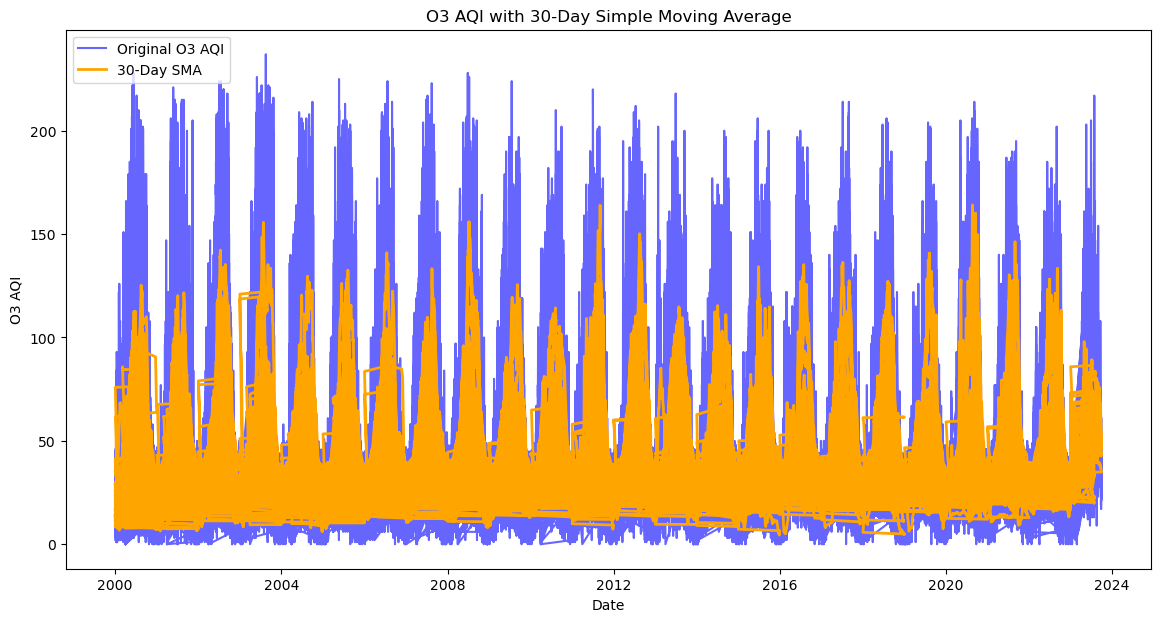

Plot generated for 'O3 AQI' and {window_size}-Day SMA.
Data split into training and testing sets (80% training, 20% testing).
Mean Absolute Error (MAE): 8.533257440845187
Mean Squared Error (MSE): 176.50221707088392
Root Mean Squared Error (RMSE): 13.28541369588783
R-squared (R2): 0.5421264003368349
Coefficient of Variation (CV): 0.39395377316376534
Sensitivity: 0.6352107644677304
Specificity: 0.9207048079320991


In [7]:
# Import necessary libraries for data analysis and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns

# Step 1: Data Loading and Exploration
# Load the dataset
data_url = "pollution_2000_2023.csv"
df = pd.read_csv(data_url)

# Dataset loaded successfully
print("Dataset loaded successfully.")

# Display the first few rows of the data
print("First 5 rows of the dataset:")
print(df.head())

# Display the column names of the dataset
print(f"Column names in the dataset: {df.columns.tolist()}")

# Step 2: Data Preprocessing
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
print("Converted 'Date' column to datetime format.")

# Drop unnecessary columns for analysis (e.g., 'Unnamed: 0', 'Address', etc.)
df_cleaned = df.drop(columns=['Unnamed: 0', 'Address', 'State', 'County', 'City'])
print("Dropped unnecessary columns: 'Unnamed: 0', 'Address', 'State', 'County', 'City'.")

# Handle missing values (if any) by filling them with the mean of the respective columns
df_cleaned.fillna(df_cleaned.mean(), inplace=True)
print("Filled missing values with the mean of respective columns.")

# Set the 'Date' column as the index
df_cleaned.set_index('Date', inplace=True)
print("Set 'Date' column as the index.")

# Check the cleaned data
print("First 5 rows of cleaned data:")
print(df_cleaned.head())

# Step 3: Apply Simple Moving Average (SMA)
# We will predict the 'O3 AQI' (Ozone Air Quality Index) using a simple moving average method

# Define the window size for the moving average
window_size = 30  # 30-day window for SMA
print(f"Using a {window_size}-day moving average.")

# Calculate the Simple Moving Average
df_cleaned['SMA'] = df_cleaned['O3 AQI'].rolling(window=window_size).mean()
print(f"Calculated {window_size}-day Simple Moving Average (SMA).")

# Step 4: Data Visualization
# Plot the original 'O3 AQI' values and the moving average
plt.figure(figsize=(14, 7))
plt.plot(df_cleaned['O3 AQI'], label='Original O3 AQI', color='blue', alpha=0.6)
plt.plot(df_cleaned['SMA'], label=f'{window_size}-Day SMA', color='orange', linewidth=2)
plt.title(f'O3 AQI with {window_size}-Day Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('O3 AQI')
plt.legend(loc='upper left')
plt.show()
print("Plot generated for 'O3 AQI' and {window_size}-Day SMA.")

# Step 5: Model Evaluation
# We will evaluate the performance of the SMA model using several metrics

# Split the data into training and testing sets
train_size = int(len(df_cleaned) * 0.8)
train_data = df_cleaned[:train_size]
test_data = df_cleaned[train_size:]
print("Data split into training and testing sets (80% training, 20% testing).")

# Compare predicted SMA values with actual values in the test set
y_true = test_data['O3 AQI']
y_pred = test_data['SMA'].dropna()

# Evaluate performance using different metrics

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# R-squared (R2)
r2 = r2_score(y_true, y_pred)
print(f'R-squared (R2): {r2}')

# Step 6: Evaluation with Other Metrics
# Coefficient of Variation (CV) - to evaluate consistency of the model
cv = np.std(y_pred) / np.mean(y_pred)
print(f'Coefficient of Variation (CV): {cv}')

# Sensitivity / Specificity (for binary classification, can be adapted for thresholds)
# For now, let's assume AQI > 50 is considered "high pollution"
threshold = 50
y_true_class = (y_true > threshold).astype(int)
y_pred_class = (y_pred > threshold).astype(int)

# Sensitivity (True Positive Rate)
sensitivity = np.sum((y_true_class == 1) & (y_pred_class == 1)) / np.sum(y_true_class == 1)
print(f'Sensitivity: {sensitivity}')

# Specificity (True Negative Rate)
specificity = np.sum((y_true_class == 0) & (y_pred_class == 0)) / np.sum(y_true_class == 0)
print(f'Specificity: {specificity}')

# Step 7: CRISP-DM Analysis and Future Work
# CRISP-DM stands for Cross-Industry Standard Process for Data Mining. The methodology used here follows the CRISP-DM steps:
# 1. Business Understanding: Understanding the problem of air pollution and its impact.
# 2. Data Understanding: The dataset provides pollution readings for multiple cities over a period.
# 3. Data Preparation: Data was cleaned, transformed, and prepared by filling missing values and setting the date as the index.
# 4. Modeling: We used the Simple Moving Average method for time-series forecasting.
# 5. Evaluation: Multiple performance metrics were applied to evaluate the model's accuracy.
# 6. Deployment: In real-world scenarios, such a model can assist in air quality forecasting.

# Future work could involve experimenting with more advanced models such as ARIMA, LSTM networks, or other time-series forecasting models.

# Step 8: Conclusion
# The Simple Moving Average (SMA) method provided a basic approach to forecasting air quality (O3 AQI). 
# While it is simple, it shows how basic methods can still provide meaningful insights. 
# However, for more accurate predictions, more complex models need to be explored, such as ARIMA, LSTM, or Random Forest models.
